In [4]:
import darksim.framework as framework
import darksim.dmath as dmath

import darksim.utils as utils

import numpy as np
import matplotlib.pyplot as plt
utils.const.H_0

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


70000.0

In [5]:
uni = framework.ModelUniverse(w=0, vis_matter=0.06, dark_matter=0.24, dark_energy=0.67, radiation=8.4e-5, lam=0.0)
fea = uni._friedmann_age
fed = uni._friedmann_dist

0


In [6]:
str(uni)

'ModelUniverse_vm0,06_dm0,24_r8,4e-05_l0,0_de0,67-0'

In [7]:
result = uni.simulate(0.01, 5, 5, N_mesh=64)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [8]:
import sys
sys.getsizeof(result)

56

In [9]:
result[0]

[<tf.Tensor: shape=(3, 2, 262144, 3), dtype=float32, numpy=
 array([[[[-6.7501189e-03, -4.5145731e-02, -3.1329628e-02],
          [-7.2748889e-03, -4.7247626e-02,  9.5367420e-01],
          [-8.7936008e-03, -4.7584198e-02,  1.9510977e+00],
          ...,
          [ 6.2989441e+01,  6.2975742e+01,  6.0987663e+01],
          [ 6.2988949e+01,  6.2980156e+01,  6.1982990e+01],
          [ 6.2991230e+01,  6.2978725e+01,  6.2973412e+01]],
 
         [[ 1.0599281e-02, -3.2516517e-02, -6.7669697e-02],
          [-5.2585788e-03, -3.0904513e-02,  9.5979673e-01],
          [-6.3873520e-03, -2.8671941e-02,  1.9765302e+00],
          ...,
          [ 6.2999107e+01,  6.3006996e+01,  6.0918491e+01],
          [ 6.3003250e+01,  6.2998234e+01,  6.1912064e+01],
          [ 6.3007988e+01,  6.2991646e+01,  6.2938881e+01]]],
 
 
        [[[-3.7228351e-04, -2.5134936e-03, -1.7389318e-03],
          [-4.0275810e-04, -2.6314016e-03, -2.5730692e-03],
          [-4.8935885e-04, -2.6493783e-03, -2.7170447e-03],
 

In [7]:
# x = dmath.get_dist(fed, zarr)
x = dmath.get_age(fea, zarr)
# z = x[:,0]
# age = x[:,1]

NameError: name 'zarr' is not defined

In [1]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x[:,0], x[-1:,1] - x[:,1], color='blue', lw=2)
# # ax.plot(x[:,0], x[:,1], color='blue', lw=2)
# # ax.plot(x[:,0], x[:,2], color='green', lw=2)
# # ax.plot(x[:,0], x[:,3], color='purple', lw=2)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim(1e2, 1e-2)
# plt.show()

NameError: name 'plt' is not defined

In [2]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x[:,1], 1/(zarr+1), color='blue', lw=2)
ax.set_yscale('log')
ax.set_xscale('log')



NameError: name 'plt' is not defined

In [10]:
times = np.logspace(-10, 3, 100000)
times

array([1.00000000e-10, 1.00029938e-10, 1.00059886e-10, ...,
       9.99401501e+02, 9.99700706e+02, 1.00000000e+03])

In [24]:
q0 = uni._r + (uni._vm + uni._dm) / 2 - 0.0 + (1 + 3 * -1)/2 * 0.62
# q0 = -1e-2
print(q0)
# Taylor series expansion
def a(t):
    # t here is the lookback time (t-t_0) but we assume t_0 = today = 0
    return 1*(1 + 70000*t - 0.5*q0*70000**2*t**2 + (1/6)*q0**2*70000**3*t**3 - (1/24)*q0**3*70000**4*t**4)
a(.01)

-0.469916


1050845229.0234925

In [25]:
res = a(times)
times = times

In [26]:
if np.where(np.diff(res) / np.diff(times*3e16) >= 3e8)[0].shape[0] > 0:
    print('big rip')
# res

(array([95732, 95733, 95734, ..., 99996, 99997, 99998]),)

In [14]:
np.diff(res) / np.diff(times*3e16)

array([ 2.33333251e-12,  2.33333235e-12,  2.33333248e-12, ...,
       -1.67201942e+07, -1.67352160e+07, -1.67502513e+07])

In [15]:
der = np.diff(res) / np.diff(times)
der

array([ 6.99999752e+04,  6.99999706e+04,  6.99999745e+04, ...,
       -5.01605827e+23, -5.02056480e+23, -5.02507538e+23])

In [16]:
np.column_stack((times, res))

array([[ 1.00000000e-10,  1.00000700e+00],
       [ 1.00029938e-10,  1.00000700e+00],
       [ 1.00059886e-10,  1.00000700e+00],
       ...,
       [ 9.99401501e+02, -1.25382647e+26],
       [ 9.99700706e+02, -1.25532864e+26],
       [ 1.00000000e+03, -1.25683262e+26]])

In [17]:

np.savetxt('big_rip1.csv', np.column_stack((times, res)))

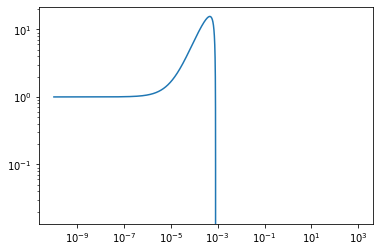

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(times, res)
ax.set_yscale('log')
ax.set_xscale('log')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(times[1:10001], (np.diff(res) / np.diff(times*3e16))[:10000])
ax.set_yscale('log')
ax.set_xscale('log')

In [ ]:
x = np.loadtxt('big_rip.csv')
x

In [ ]:
np.diff(x[:,1]*.3)/ (np.diff(x[:,0]))